<a href="https://colab.research.google.com/github/Saul-Ochoa/Python-MachineLearning/blob/main/Clustering/ClusteringWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine**

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import time

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

In [43]:
url='https://raw.githubusercontent.com/Saul-Ochoa/Python-MachineLearning/main/Clustering/wine-clustering.csv'
df=pd.read_csv(url,sep=',')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
df.shape

(178, 13)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [46]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [47]:
data = pd.DataFrame()

data.index =  df.columns
data['count_NaN'] = df.isna().sum()
data['dtypes'] = df.dtypes
data['uniq'] = df.nunique()
data['repeat'] = df.shape[0] - data['uniq']
data['shape'] = df.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
Alcohol,0,float64,126,52,178
Malic_Acid,0,float64,133,45,178
Ash,0,float64,79,99,178
Ash_Alcanity,0,float64,63,115,178
Magnesium,0,int64,53,125,178
Total_Phenols,0,float64,97,81,178
Flavanoids,0,float64,132,46,178
Nonflavanoid_Phenols,0,float64,39,139,178
Proanthocyanins,0,float64,101,77,178
Color_Intensity,0,float64,132,46,178


In [48]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [49]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

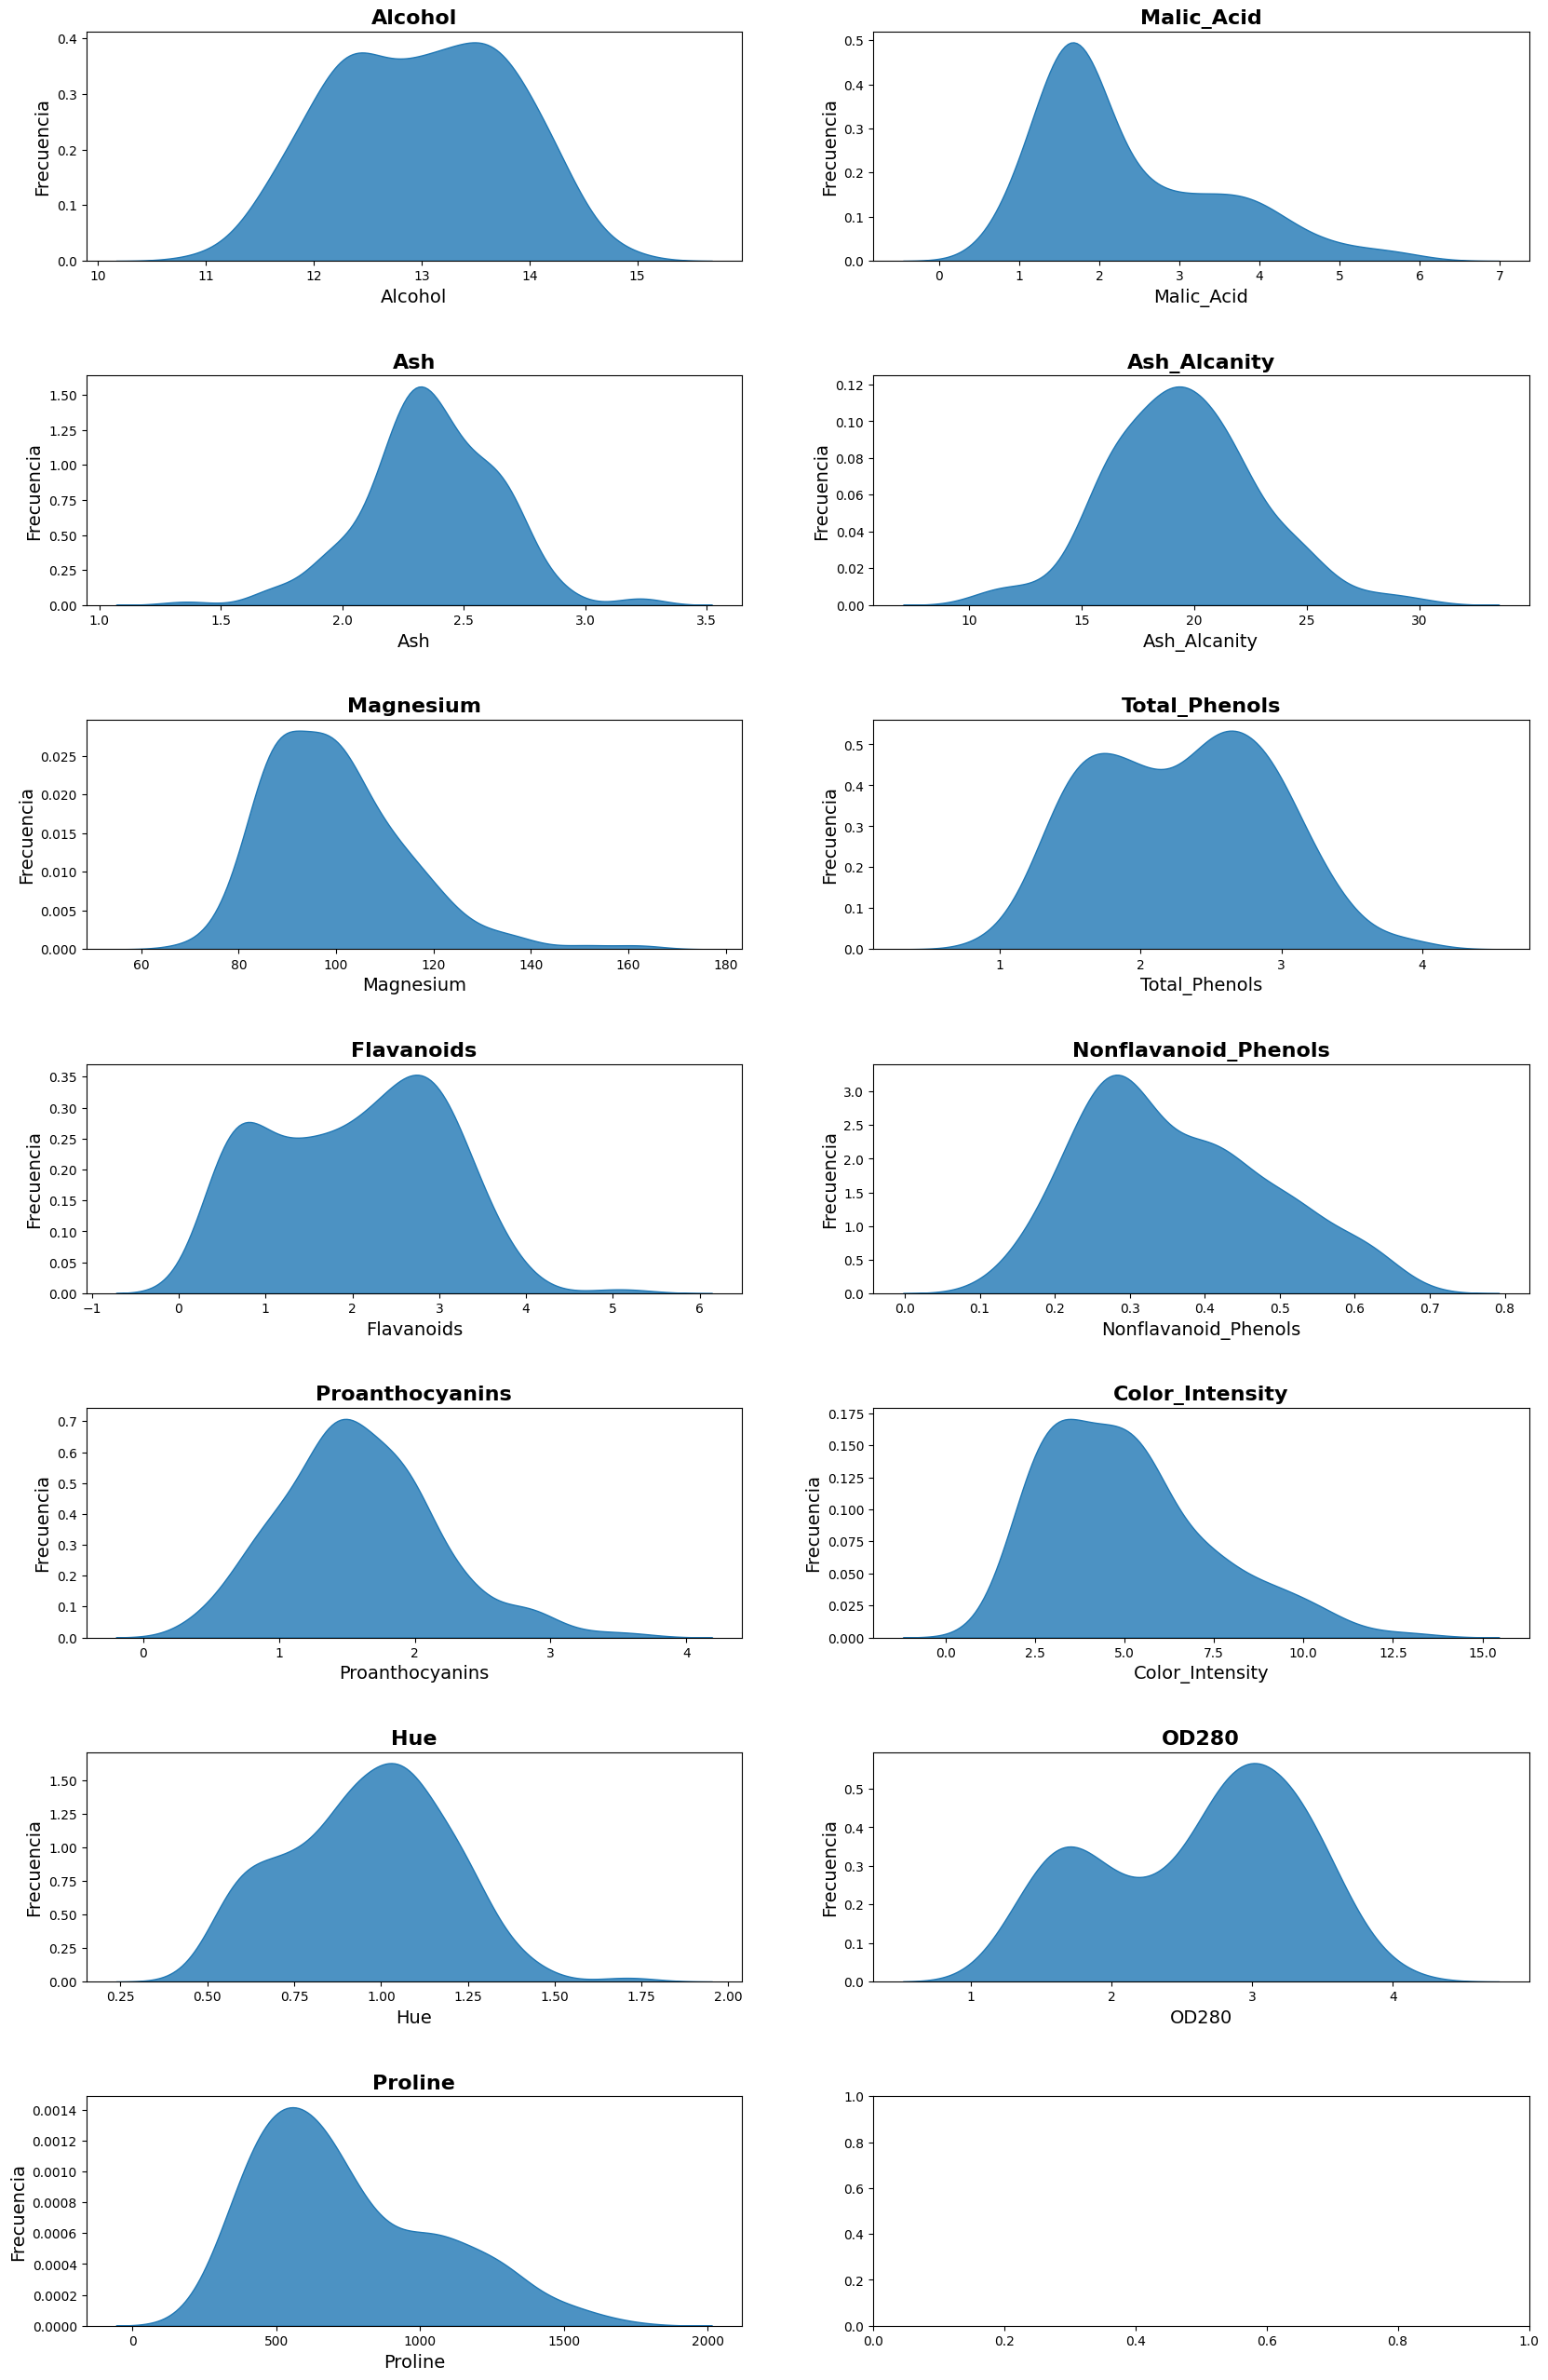

In [50]:
fig,axes=plt.subplots(7,2,figsize=(20,32))
plt.subplots_adjust(hspace=0.5)
col=df.columns
for i, col in enumerate(col):
  ax=axes[i//2,i%2]
  sns.kdeplot(data=df,x=col,fill=True,alpha=0.8,ax=ax)
  ax.set_title(col, fontweight = 'bold', fontsize = 16)
  ax.set_xlabel(col, fontsize = 14)
  ax.set_ylabel('Frecuencia', fontsize = 14)
plt.show()

In [52]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que deseas normalizar
columnas_a_normalizar = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
# Aplicar el escalado Min-Max a las columnas seleccionadas
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])

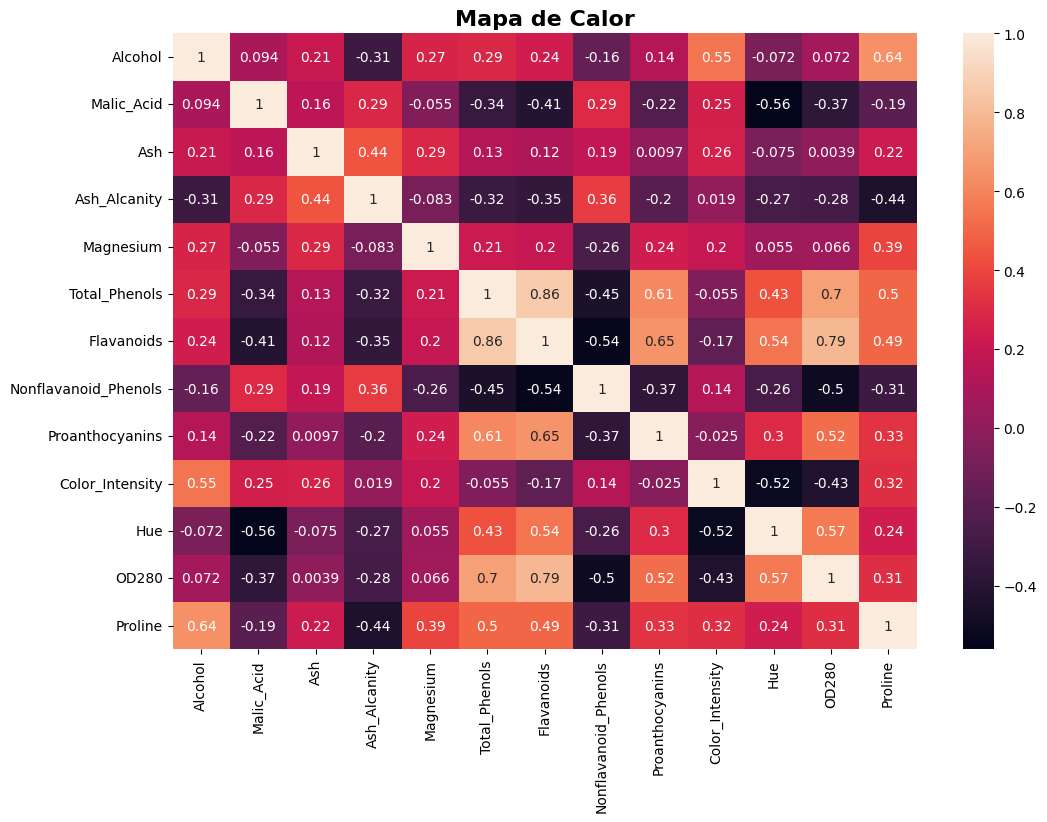

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Calor',fontsize=16,weight='bold')
plt.show()

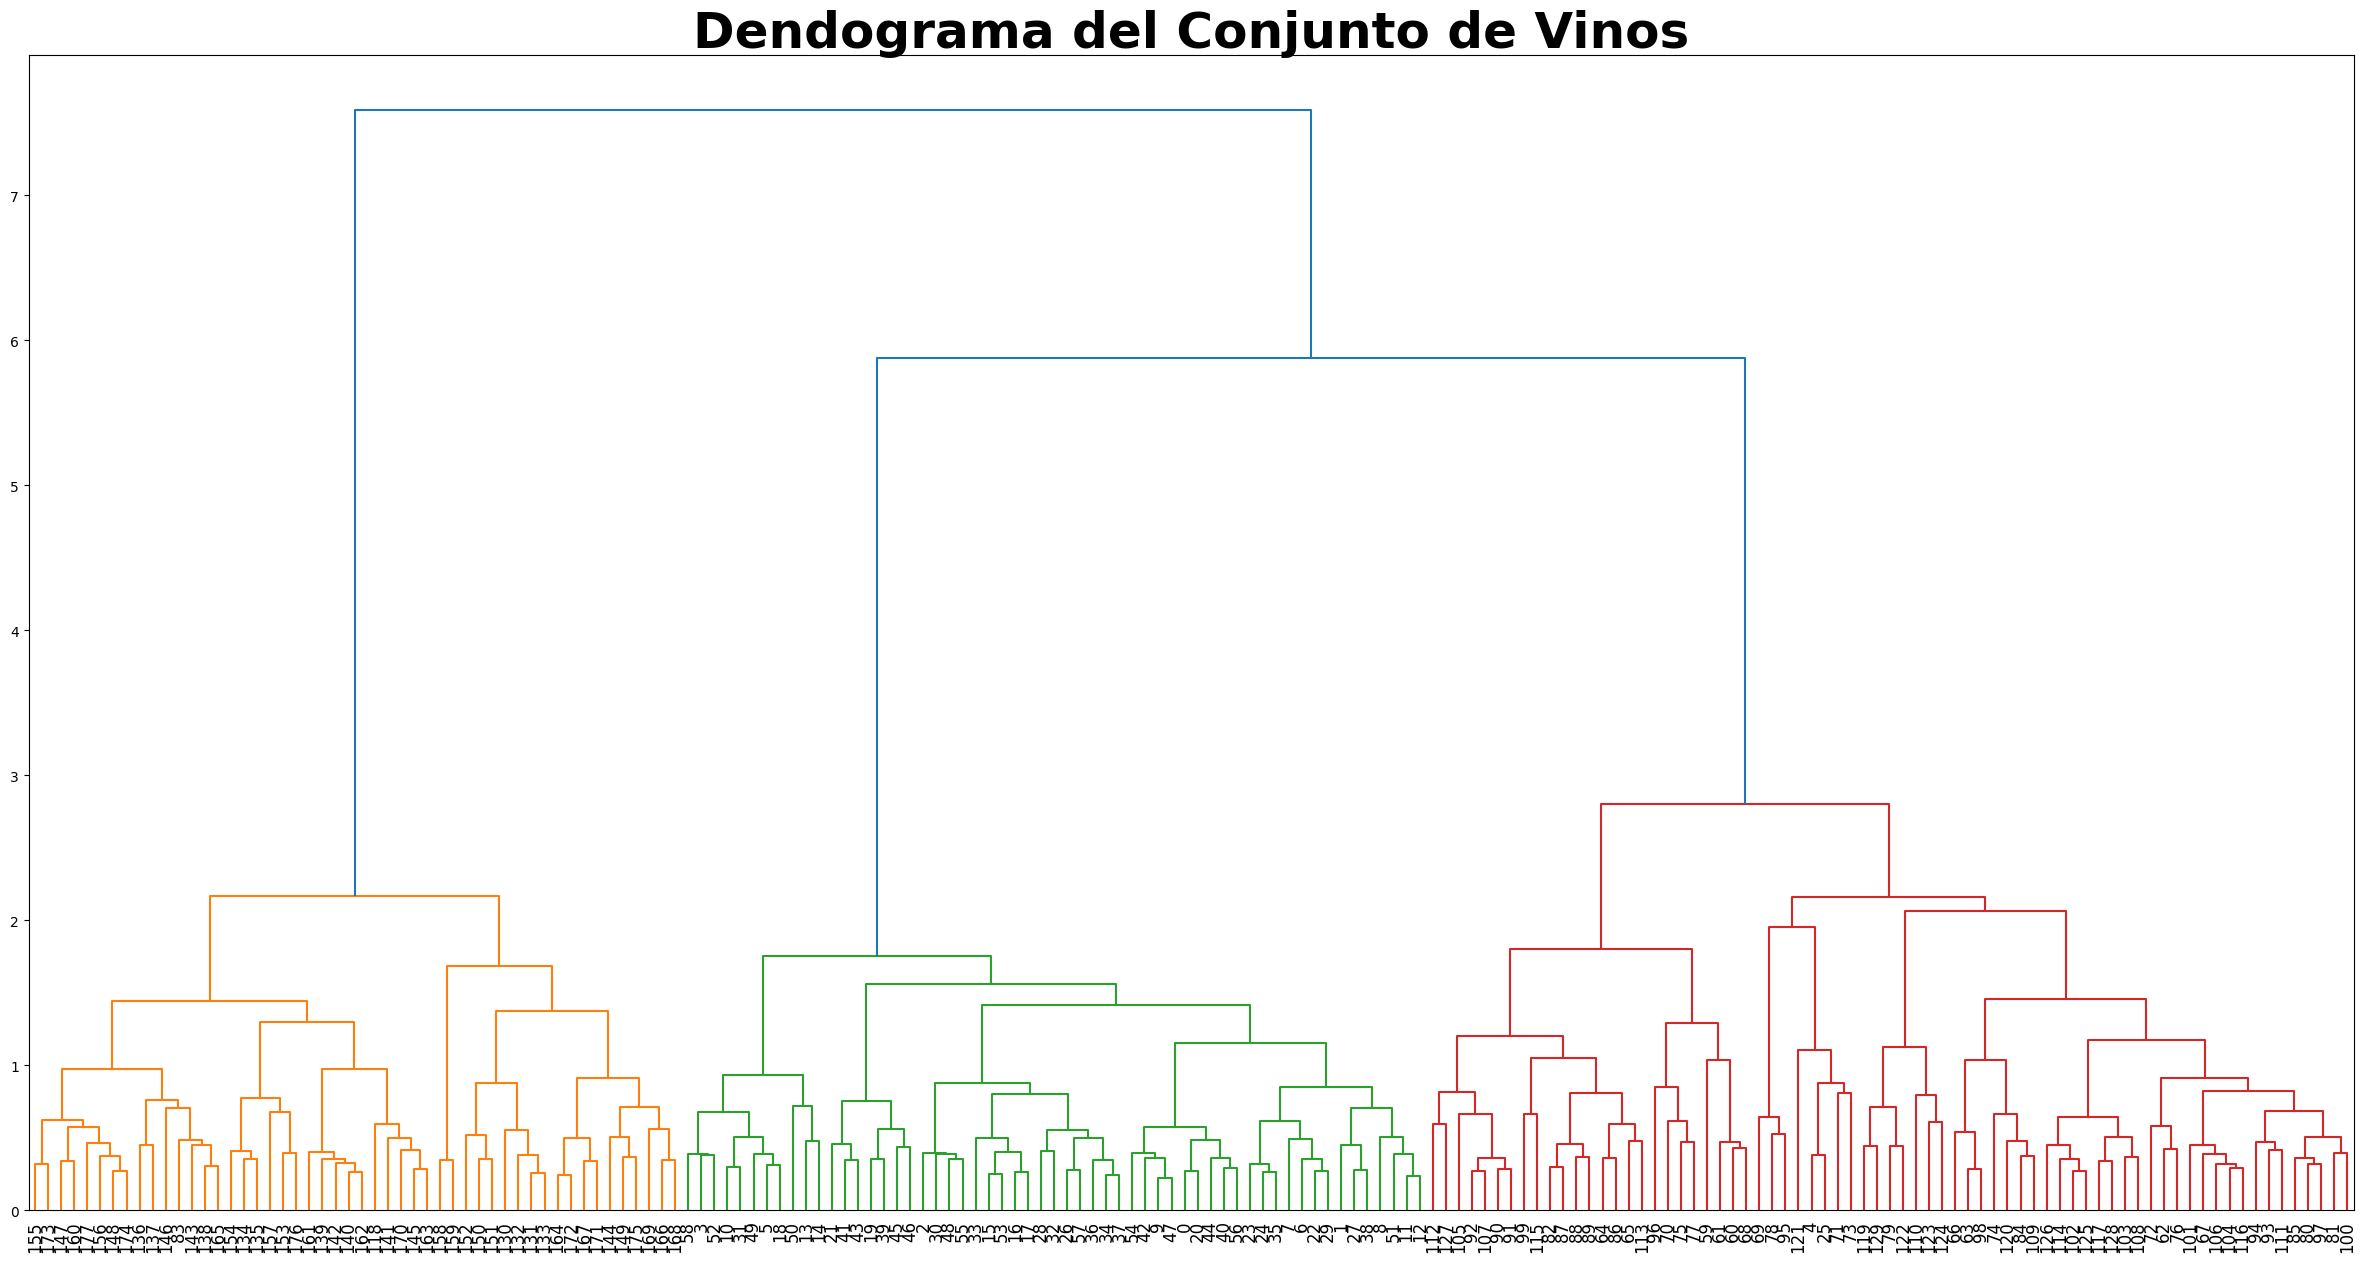

In [55]:
plt.figure(figsize=(30, 15))
shc.dendrogram(shc.linkage(df,method='ward'))
plt.xticks(fontsize=12)
plt.title('Dendograma del Conjunto de Vinos',fontweight='bold',fontsize=36)
plt.show()

<Figure size 3000x1500 with 0 Axes>

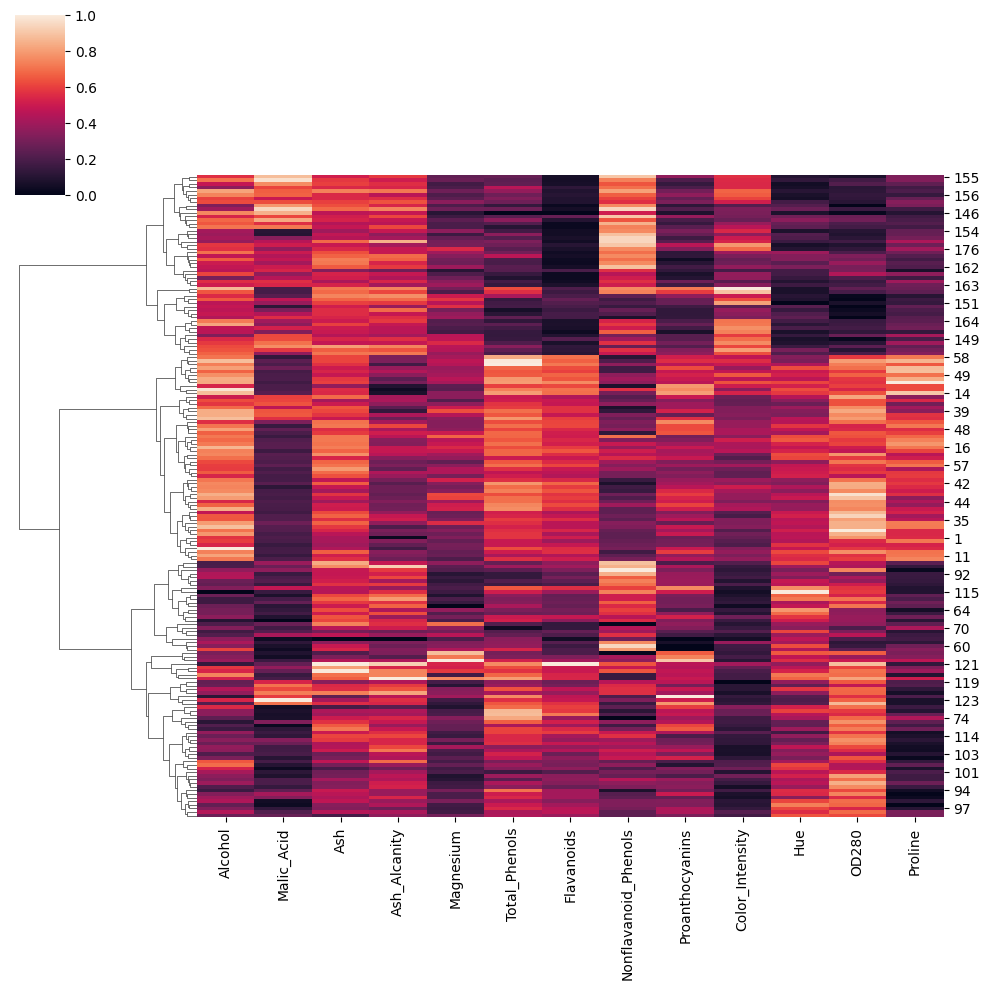

In [56]:
plt.figure(figsize=((30, 15)))
sns.clustermap(df, col_cluster=False,method='ward',metric='euclidean')
plt.show()

<Figure size 3000x1500 with 0 Axes>

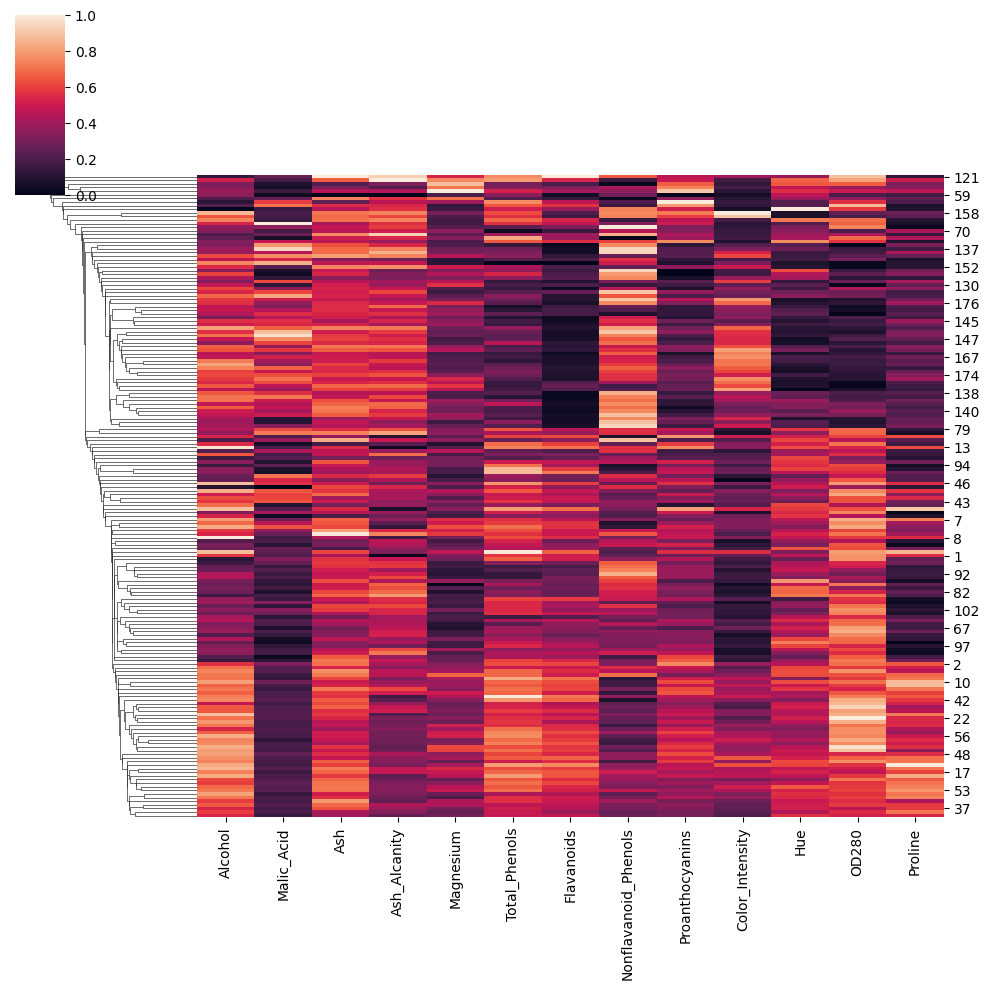

In [57]:
plt.figure(figsize=((30, 15)))
sns.clustermap(df, col_cluster=False, method='single', metric='euclidean')
plt.show()

<Figure size 3000x1500 with 0 Axes>

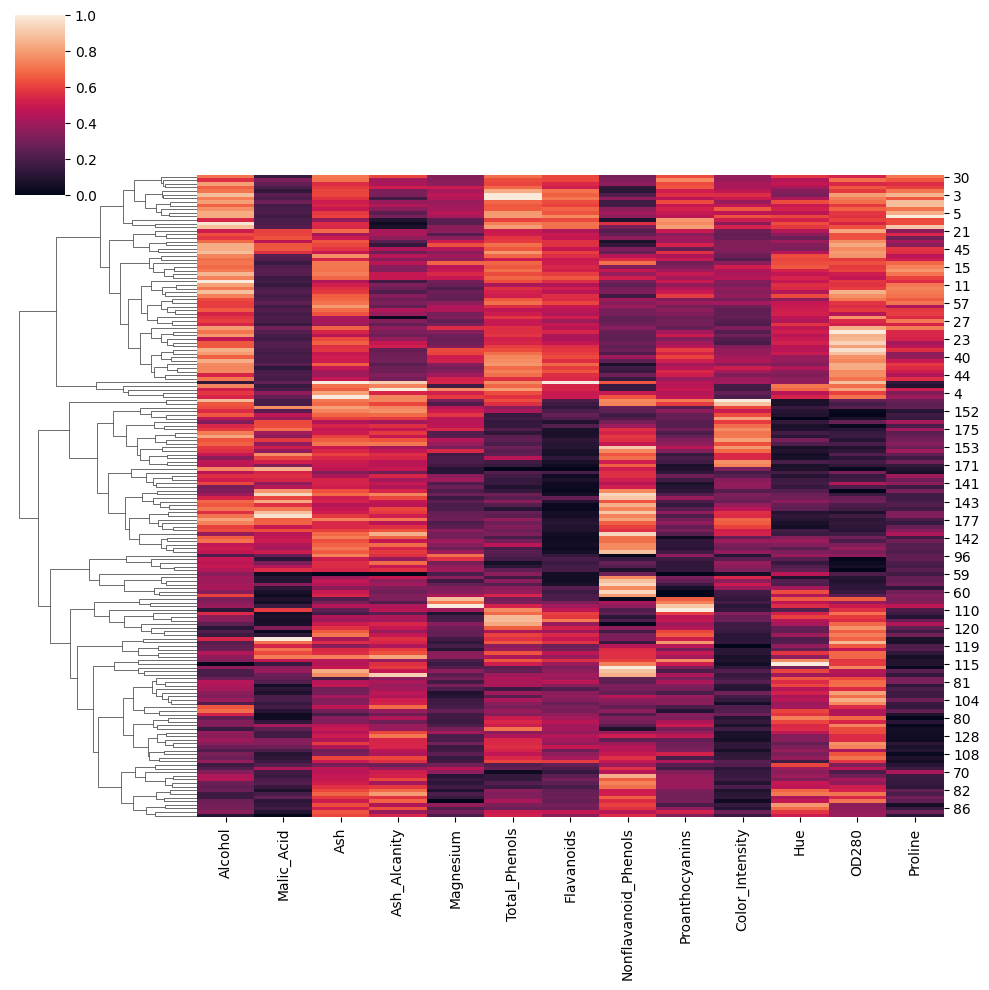

In [58]:
plt.figure(figsize=((30, 15)))
sns.clustermap(df, col_cluster=False, method='complete', metric='euclidean')
plt.show()

<Figure size 3000x1500 with 0 Axes>

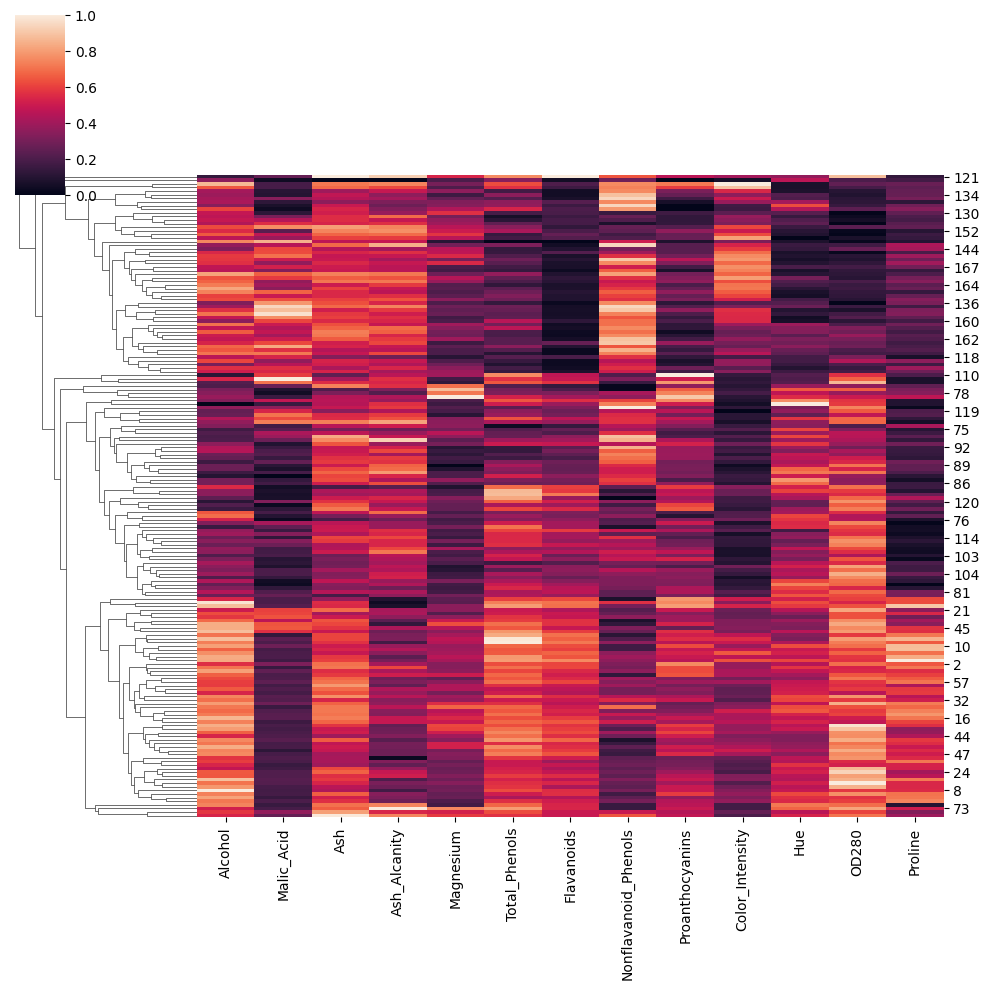

In [59]:
plt.figure(figsize=((30, 15)))
sns.clustermap(df, col_cluster=False, method='average', metric='euclidean')
plt.show()

In [61]:
agg_cluster = AgglomerativeClustering(n_clusters = 3,
                                      linkage = 'ward')
agg_cluster.fit(df)

AgglomerativeClustering(n_clusters=3)

In [62]:
labels=agg_cluster.labels_
labels

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [18]:
silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)
print('Coeficiente de Silueta', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Coeficiente de Silueta 0.561
Variance Rarion Criterion 670.626


In [63]:
data_labels = pd.DataFrame()
data_labels['Agglomerative'] = labels
data_labels.sample(10)

,Agglomerative
61,0
104,0
20,2
81,0
122,0
100,0
25,0
67,0
118,1
88,0


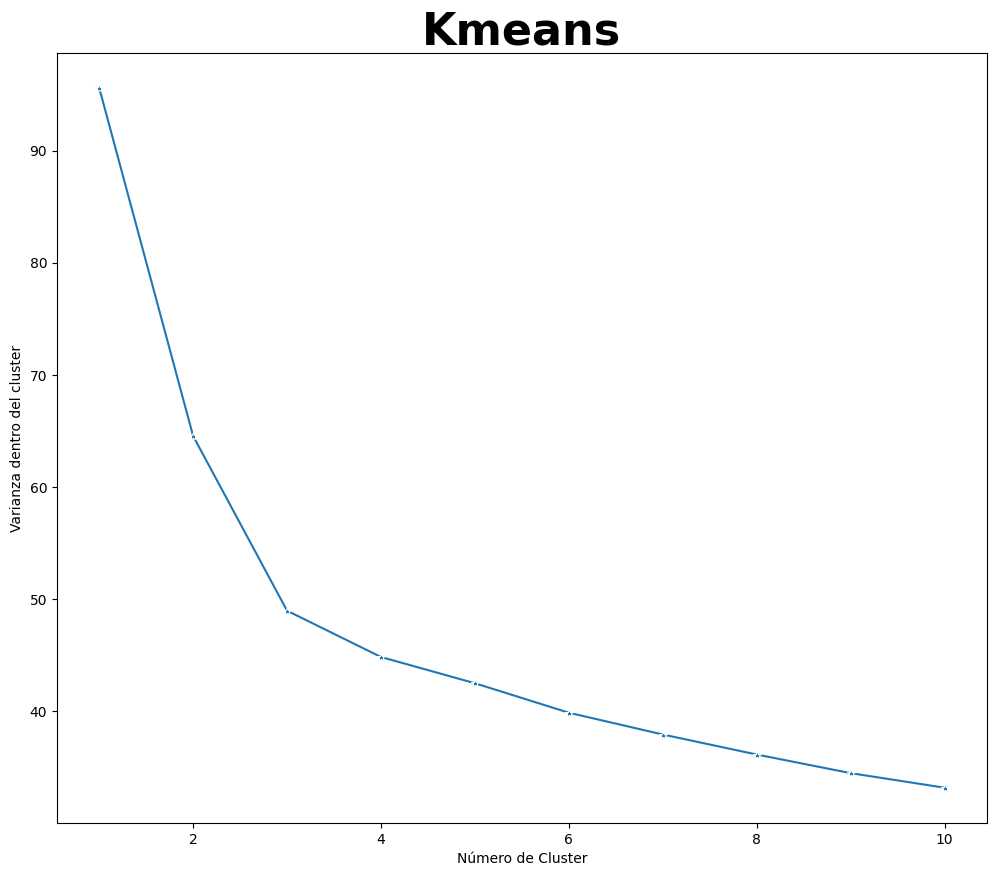

In [64]:
inertia_score=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,n_init=10,random_state=100)
  kmeans.fit(df)
  inertia_score.append(kmeans.inertia_)
fig=plt.subplots(figsize=(12,10))
sns.lineplot(x=range(1,11),y=inertia_score,marker='*')
plt.title('Kmeans',fontsize=32,fontweight='bold')
plt.xlabel('Número de Cluster')
plt.ylabel('Varianza dentro del cluster')
plt.show()


In [65]:
kmeans = KMeans(n_clusters = 3,
                n_init = 10,
                algorithm = 'elkan')

kmeans.fit(df)


KMeans(algorithm='elkan', n_clusters=3, n_init=10)

In [66]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [67]:
silhouette = silhouette_score(df, labels)
chi = calinski_harabasz_score(df, labels)
print('Coeficiente de Silueta', round(silhouette,3))
print('Variance Rarion Criterion', round(chi,3))

Coeficiente de Silueta 0.301
Variance Rarion Criterion 83.351


In [68]:
data_labels['KMeans'] = labels
data_labels.sample(10)

,Agglomerative,KMeans
4,0,1
120,0,2
34,2,1
25,0,1
87,0,2
123,0,2
166,1,0
82,0,2
176,1,0
104,0,2


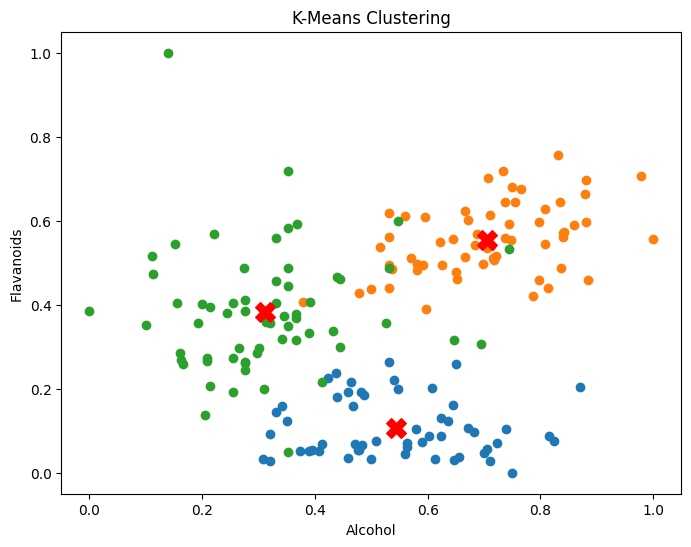

In [69]:
plt.figure(figsize=(8, 6))

# Визуализируем данные по кластерам
for i in range(3):
    plt.scatter(df.iloc[labels == i, 0], df.iloc[labels == i, 6])

# Визуализируем центры кластеров
plt.scatter(centroids[:, 0], centroids[:, 6], marker='X', s=200, color='red')

plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.title('K-Means Clustering')
plt.show()

# **Vinos**

In [26]:
url='https://raw.githubusercontent.com/rociochavezmx/Rocio-Chavez-youtube-Files/master/caracteristicas%20de%20vinos.csv'
df=pd.read_csv(url,sep=',')
df.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [28]:
df.drop(columns='Vino',axis=1,inplace=True)
df.columns

Index(['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [29]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Seleccionar las columnas que deseas normalizar
columnas_a_normalizar = ['Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']

# Aplicar el escalado Min-Max a las columnas seleccionadas
df[columnas_a_normalizar] = scaler.fit_transform(df[columnas_a_normalizar])


In [31]:
df.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


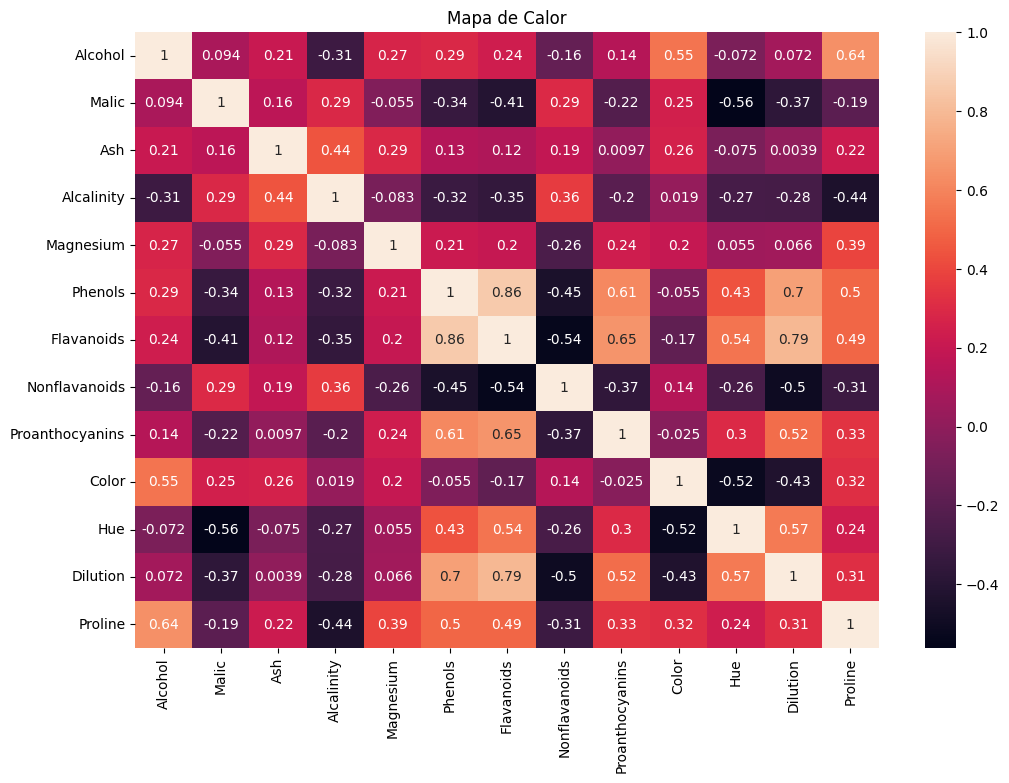

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

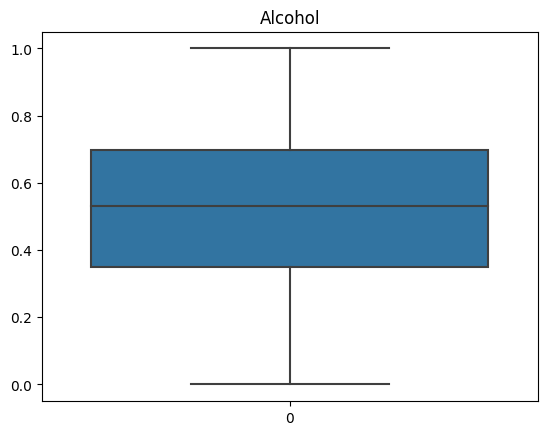

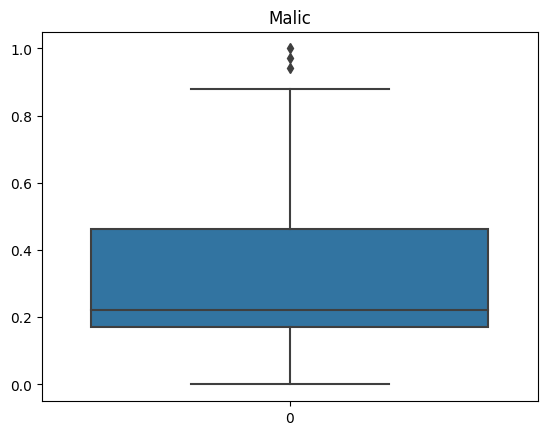

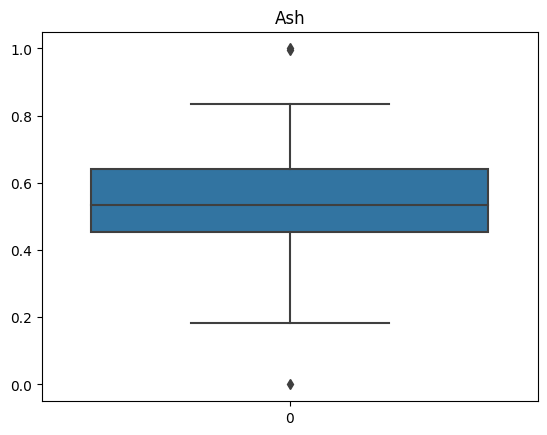

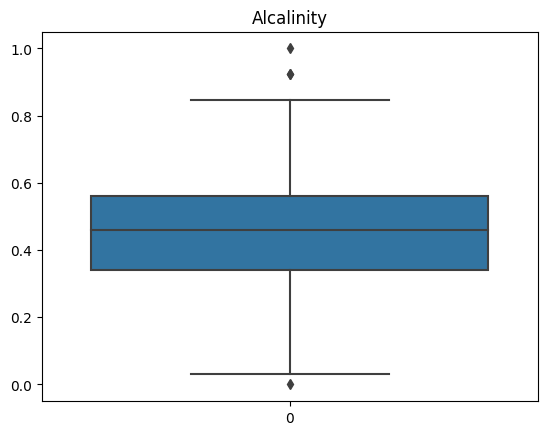

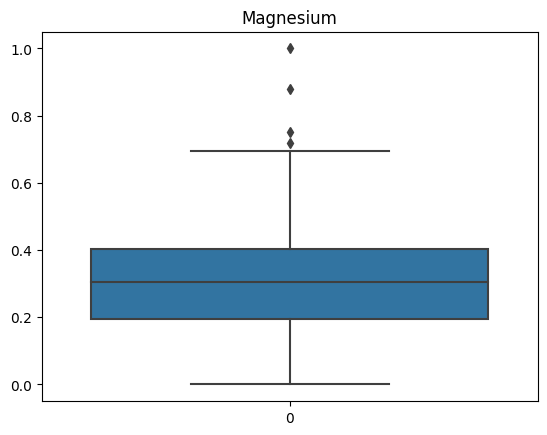

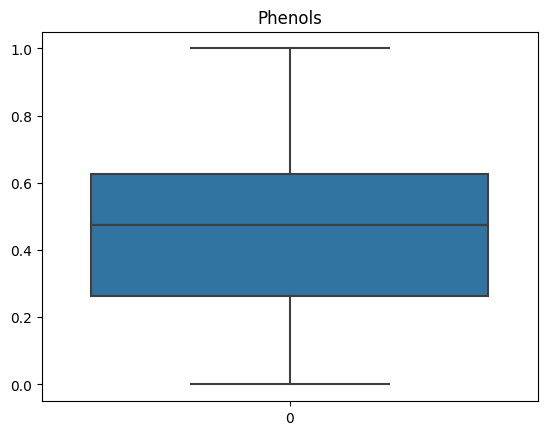

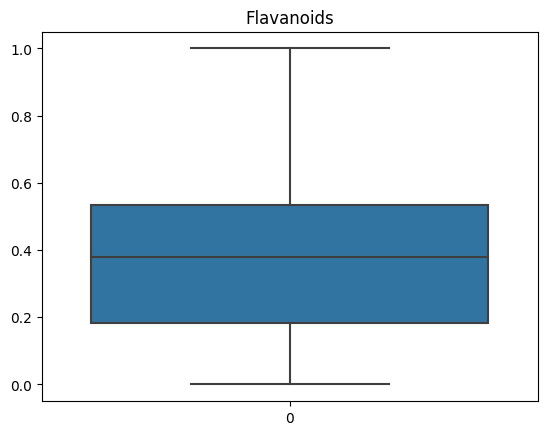

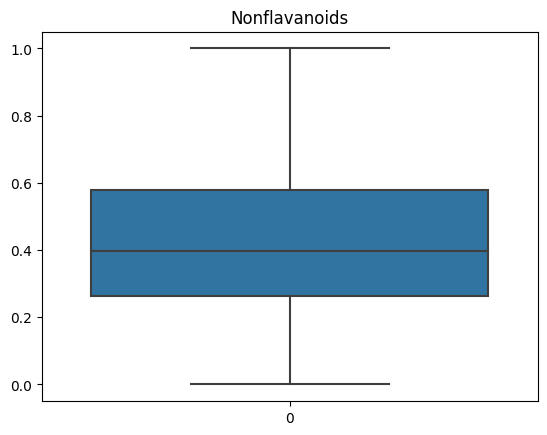

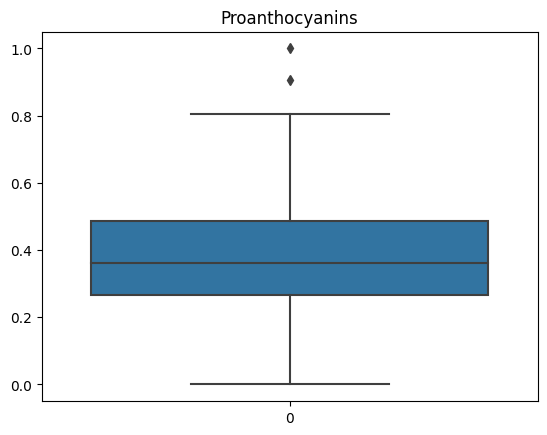

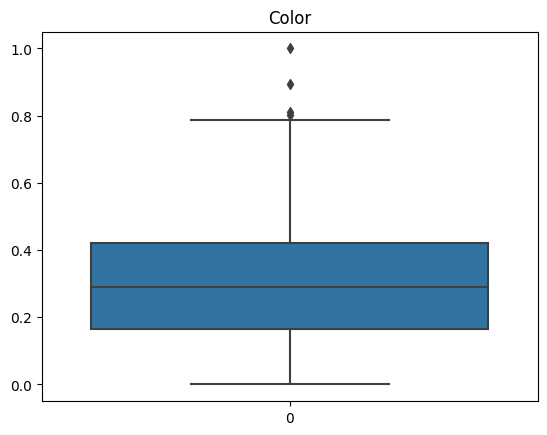

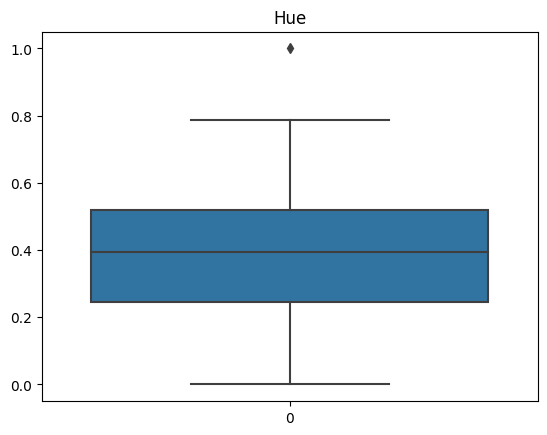

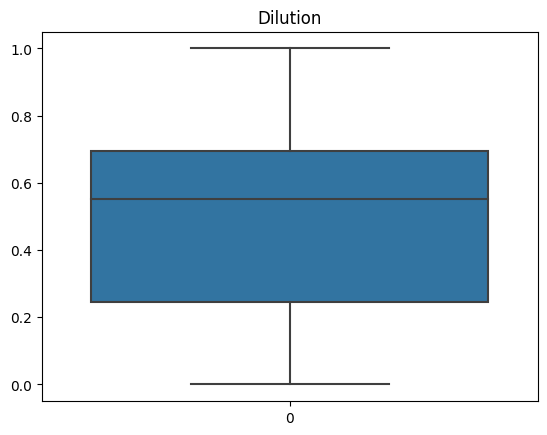

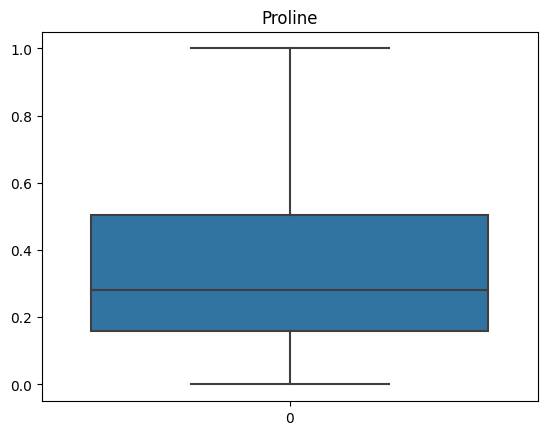

In [33]:
col=df.columns
for i in col:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

In [34]:
iterations=[]

for i in range (1,11):
  kmeans=KMeans(n_clusters=i,max_iter=300)
  kmeans.fit(df)
  iterations.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

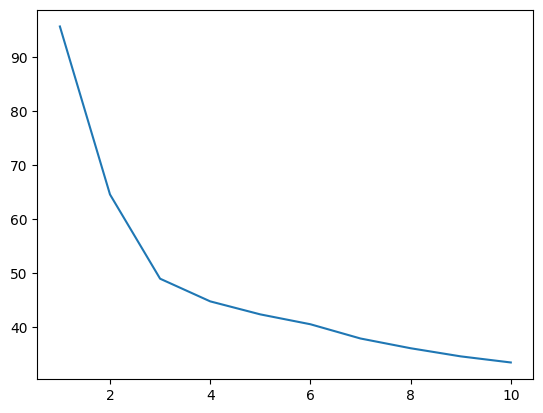

In [35]:
plt.plot(range(1,11),iterations)
plt.show()

In [36]:
clustering=KMeans(n_clusters=3,max_iter=300)
clustering.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [37]:
df['KMeans_Clusters']=clustering.labels_
df.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,2
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2


In [38]:
df.sample(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
91,0.255263,0.152174,0.566845,0.587629,0.173913,0.162069,0.191983,0.698113,0.384858,0.197952,0.463415,0.505495,0.122682,1
109,0.152632,0.120553,0.716578,0.484536,0.260870,0.606897,0.544304,0.301887,0.656151,0.116894,0.390244,0.728938,0.286733,1
128,0.352632,0.175889,0.502674,0.716495,0.195652,0.427586,0.445148,0.509434,0.470032,0.071672,0.333333,0.553114,0.045649,1
23,0.478947,0.169960,0.620321,0.371134,0.271739,0.517241,0.428270,0.245283,0.331230,0.226109,0.495935,0.864469,0.525678,2
61,0.423684,0.122530,0.352941,0.319588,0.326087,0.358621,0.225738,0.754717,0.066246,0.381399,0.406504,0.117216,0.122682,0
17,0.736842,0.164032,0.673797,0.484536,0.489130,0.679310,0.645570,0.509434,0.413249,0.453925,0.528455,0.476190,0.607703,2
102,0.344737,0.337945,0.588235,0.536082,0.304348,0.544828,0.373418,0.396226,0.283912,0.129693,0.260163,0.772894,0.114123,1
169,0.623684,0.762846,0.802139,0.742268,0.456522,0.344828,0.130802,0.264151,0.220820,0.616041,0.154472,0.238095,0.251070,0
47,0.755263,0.185771,0.406417,0.278351,0.336957,0.731034,0.643460,0.150943,0.545741,0.411263,0.349593,0.754579,0.504280,2


In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_vinos=pca.fit_transform(df)
pca_vinos_df=pd.DataFrame(data=pca_vinos,columns=['Componente_1','Componente_2'])
pca_nombre_vinos=pd.concat([pca_vinos_df,df[['KMeans_Clusters']]],axis=1)
pca_nombre_vinos


,Componente_1,Componente_2,KMeans_Clusters
0,-1.188098,-0.229012,2
1,-1.077447,0.000850,2
2,-1.095937,-0.176715,2
3,-1.243084,-0.547371,2
4,-0.942154,-0.068573,2
...,...,...,...
173,1.254971,-0.497373,0
174,1.186949,-0.362024,0
175,1.208832,-0.562049,0
176,1.183517,-0.437932,0


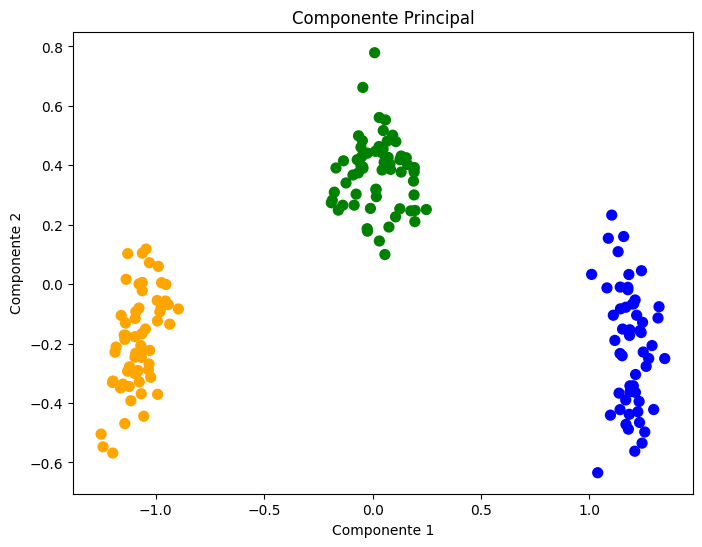

In [41]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componente Principal')
color_theme=np.array(["blue","green","orange"])
ax.scatter(x=pca_nombre_vinos.Componente_1,y=pca_nombre_vinos.Componente_2,c=color_theme[pca_nombre_vinos.KMeans_Clusters],s=50)
plt.show()